### Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import  graphviz_layout
import networkx as nx
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = [25, 20]     


def genData(param, show = False):
	a=[]
	if param[0]=="normal":
		mu, sigma, s = param[1],   param[2], param[3]
		a= np.random.normal(mu, sigma, size=s)
	elif param[0]=='uniform':
		mi, ma,s=param[1],   param[2], param[3]
		a= np.random.uniform(mi, ma, s)
	elif param[0]=="poisson":
		rate,s=param[1],   param[2]
		a = np.random.poisson(rate, s)
	if(show):
		count, bins, ignored = plt.hist(s, 14, density=True)
	return a

In [2]:
signalCount=16
signals = [] 

In [3]:
signals = [] 

for i in range(signalCount):
    a = genData(["normal", 100,100,8])
    #print(a)
    sig = [] 
    for j in range(8):
        sig.append(int(a[j]))
    signals.append(sig)
for i in range(signalCount):
    print(signals[i])


[115, 122, 149, 91, 194, 159, 104, 208]
[175, 111, 57, 22, -6, 101, 71, 9]
[139, 166, 122, -112, 73, 60, -145, 53]
[-40, 108, 91, 195, 112, 94, 43, -31]
[177, 74, 179, 0, 136, -40, 136, -2]
[92, 169, 168, 37, 39, 103, 180, -132]
[104, 45, 54, 146, 20, 2, 141, 238]
[-76, 14, 70, 13, 236, 37, -122, 212]
[108, 20, 283, 208, 84, 14, 42, 58]
[164, -31, 202, 311, 141, 169, 28, 125]
[122, 199, 95, 83, -74, 167, 154, -7]
[128, 116, 14, 190, 192, 0, 35, 138]
[271, 149, -68, -10, 9, 49, 76, 153]
[156, 120, 106, 43, 0, 28, 269, 66]
[44, 90, 58, 142, 111, 64, 219, 221]
[-50, 9, 2, -62, 38, 233, 138, 43]


# Data set
We consider a set made out of 10 digits, four operations, the equal and question mark items.
We want to build a computing system that learns to do computations when given a combination of items as input.
Learning will be performed in several steps:
1. Sample operations will be given
2. Sample that will need some output and learning will be done by energy minimization


In [4]:
signals = [[105, 220, 23, 99, 266, 190, 37, 5],
[334, 174, 134, -7, 19, 155, 93, 89],
[72, 96, 102, 151, -14, 171, 127, 127],
[151, 38, 283, 204, 232, 141, 121, 47],
[157, -60, 54, 54, 69, -27, -14, 101],
[0, 113, 74, 176, 68, 322, 135, 367],
[56, 114, 126, 181, 93, 41, 118, 76],
[164, 200, 351, 51, 36, 163, 298, -5],
[140, 124, 99, 34, -46, -5, 240, 136],
[113, 58, 130, 123, 171, 143, 109, 17],
[-8, 299, 65, 62, 130, 146, -43, 23],
[-96, 212, 56, 150, -55, 150, 151, 70],
[-22, 148, 219, 62, 108, 136, 198, 126],
[220, 84, 165, 167, 1, 227, 15, 144],
[0, 135, 165, 64, 100, 224, 244, 140],
[211, 183, -161, 65, 33, 257, -16, 112]]

In [5]:
signals = list(set(tuple(x) for x in signals))
merged_list = []

for l in signals:
    merged_list += list(l)
  

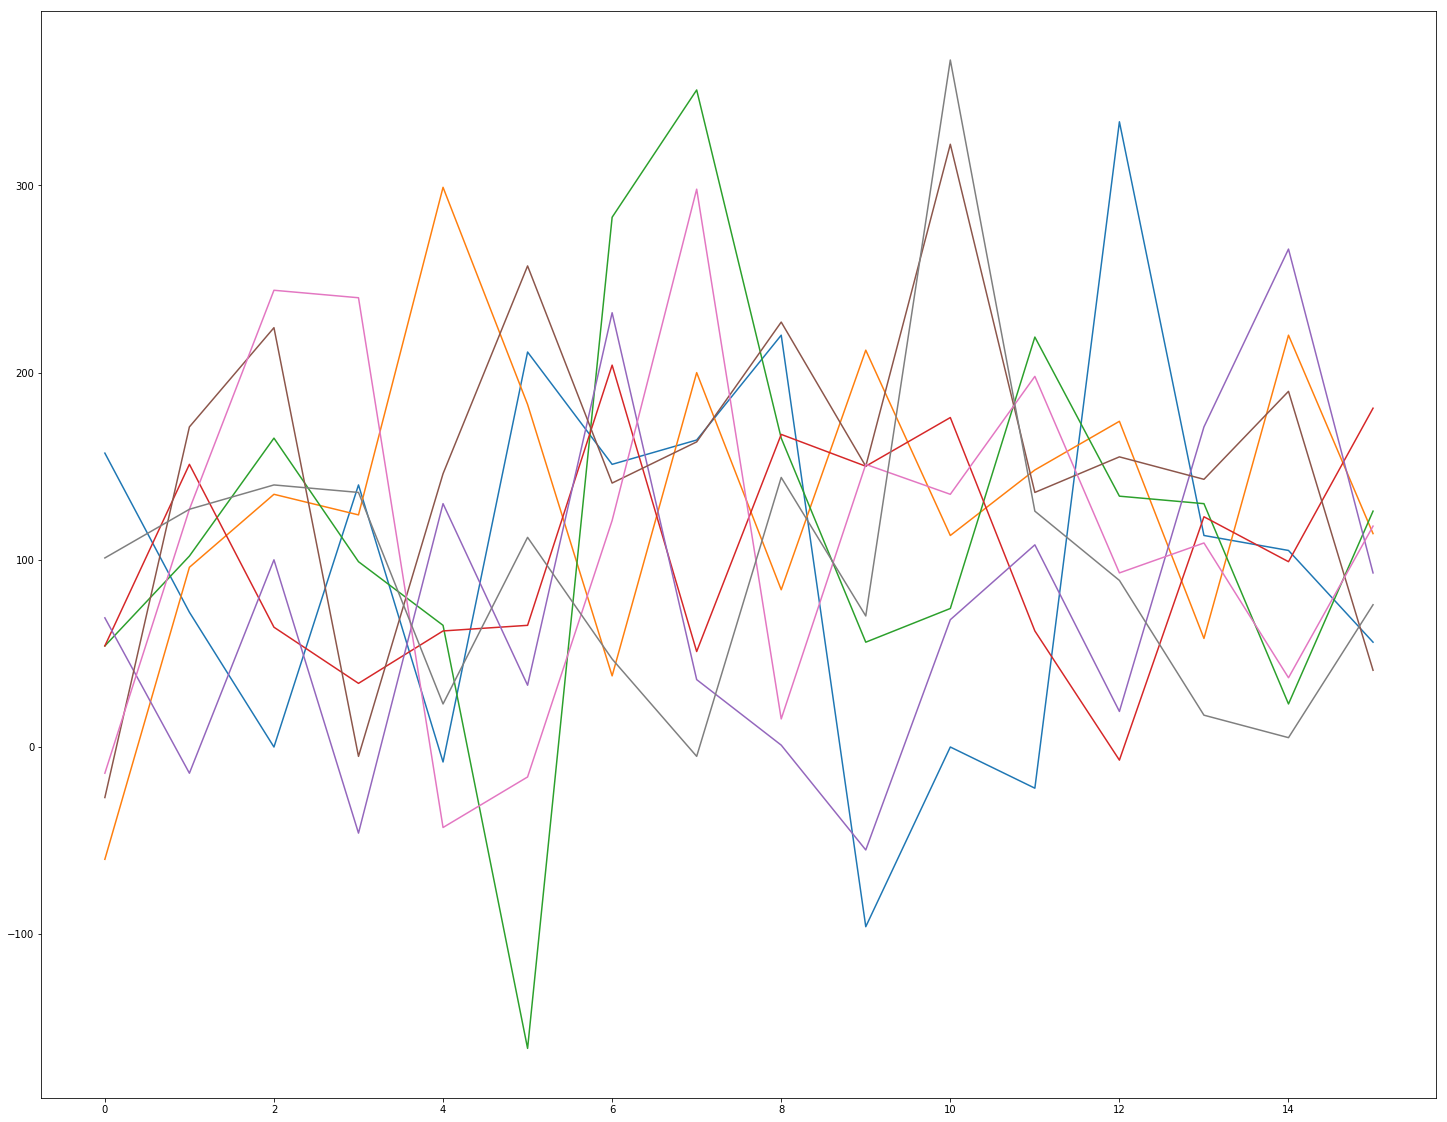

In [6]:
plt.rcParams['figure.figsize'] = [25, 20]  
plt.plot(signals)

In [7]:
df = pd.DataFrame(signals)
print(df)


      0    1    2    3    4    5    6    7
0   157  -60   54   54   69  -27  -14  101
1    72   96  102  151  -14  171  127  127
2     0  135  165   64  100  224  244  140
3   140  124   99   34  -46   -5  240  136
4    -8  299   65   62  130  146  -43   23
5   211  183 -161   65   33  257  -16  112
6   151   38  283  204  232  141  121   47
7   164  200  351   51   36  163  298   -5
8   220   84  165  167    1  227   15  144
9   -96  212   56  150  -55  150  151   70
10    0  113   74  176   68  322  135  367
11  -22  148  219   62  108  136  198  126
12  334  174  134   -7   19  155   93   89
13  113   58  130  123  171  143  109   17
14  105  220   23   99  266  190   37    5
15   56  114  126  181   93   41  118   76


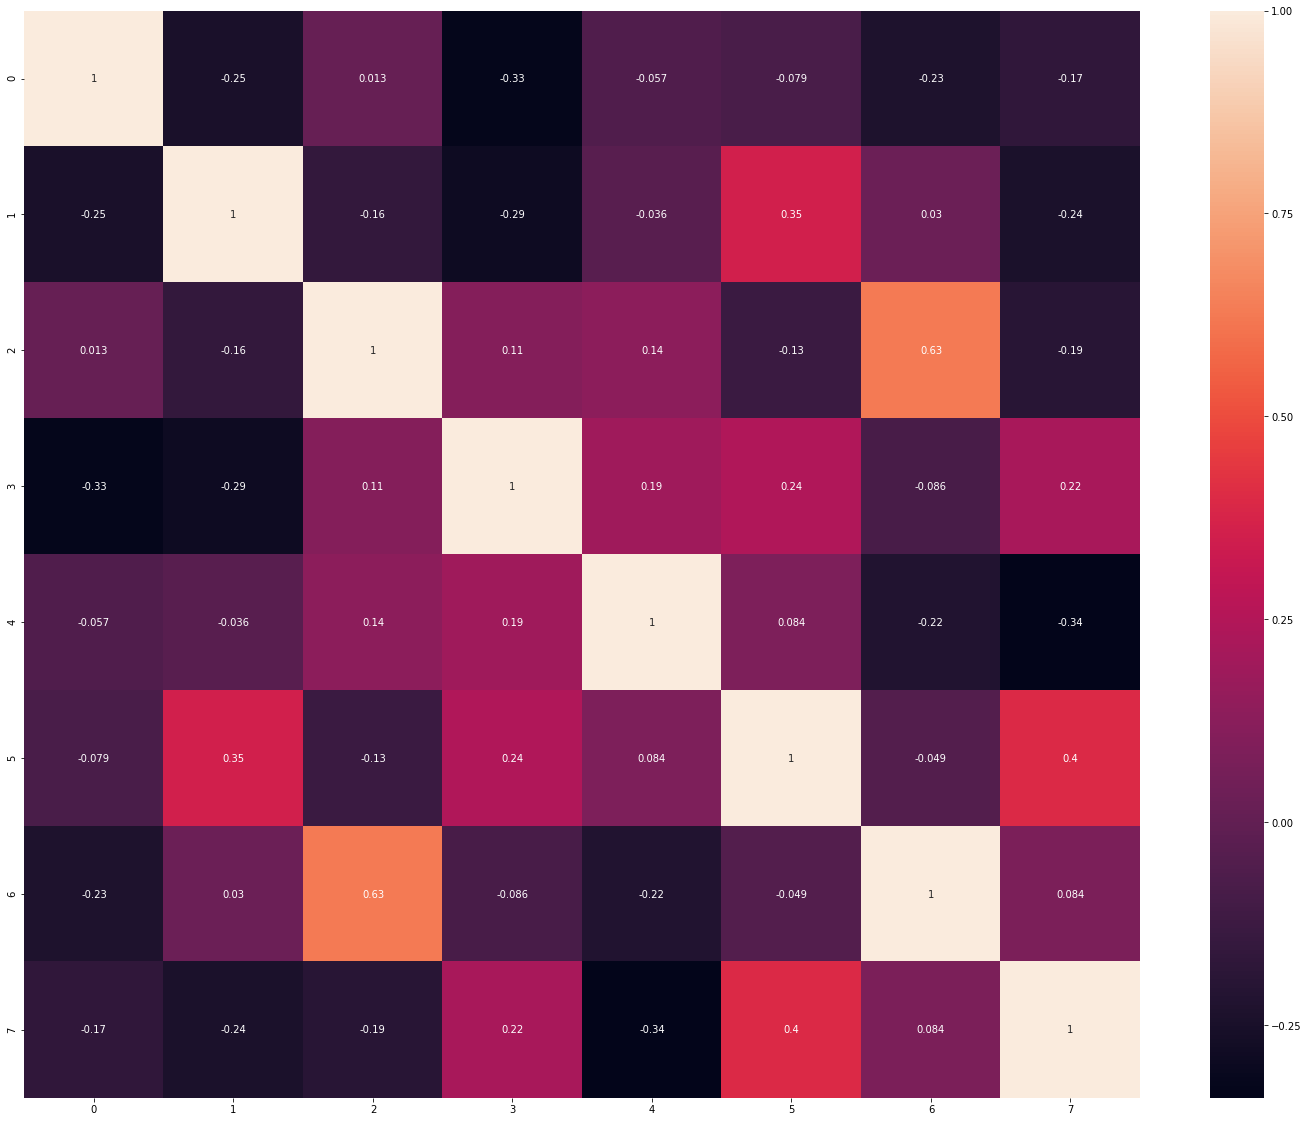

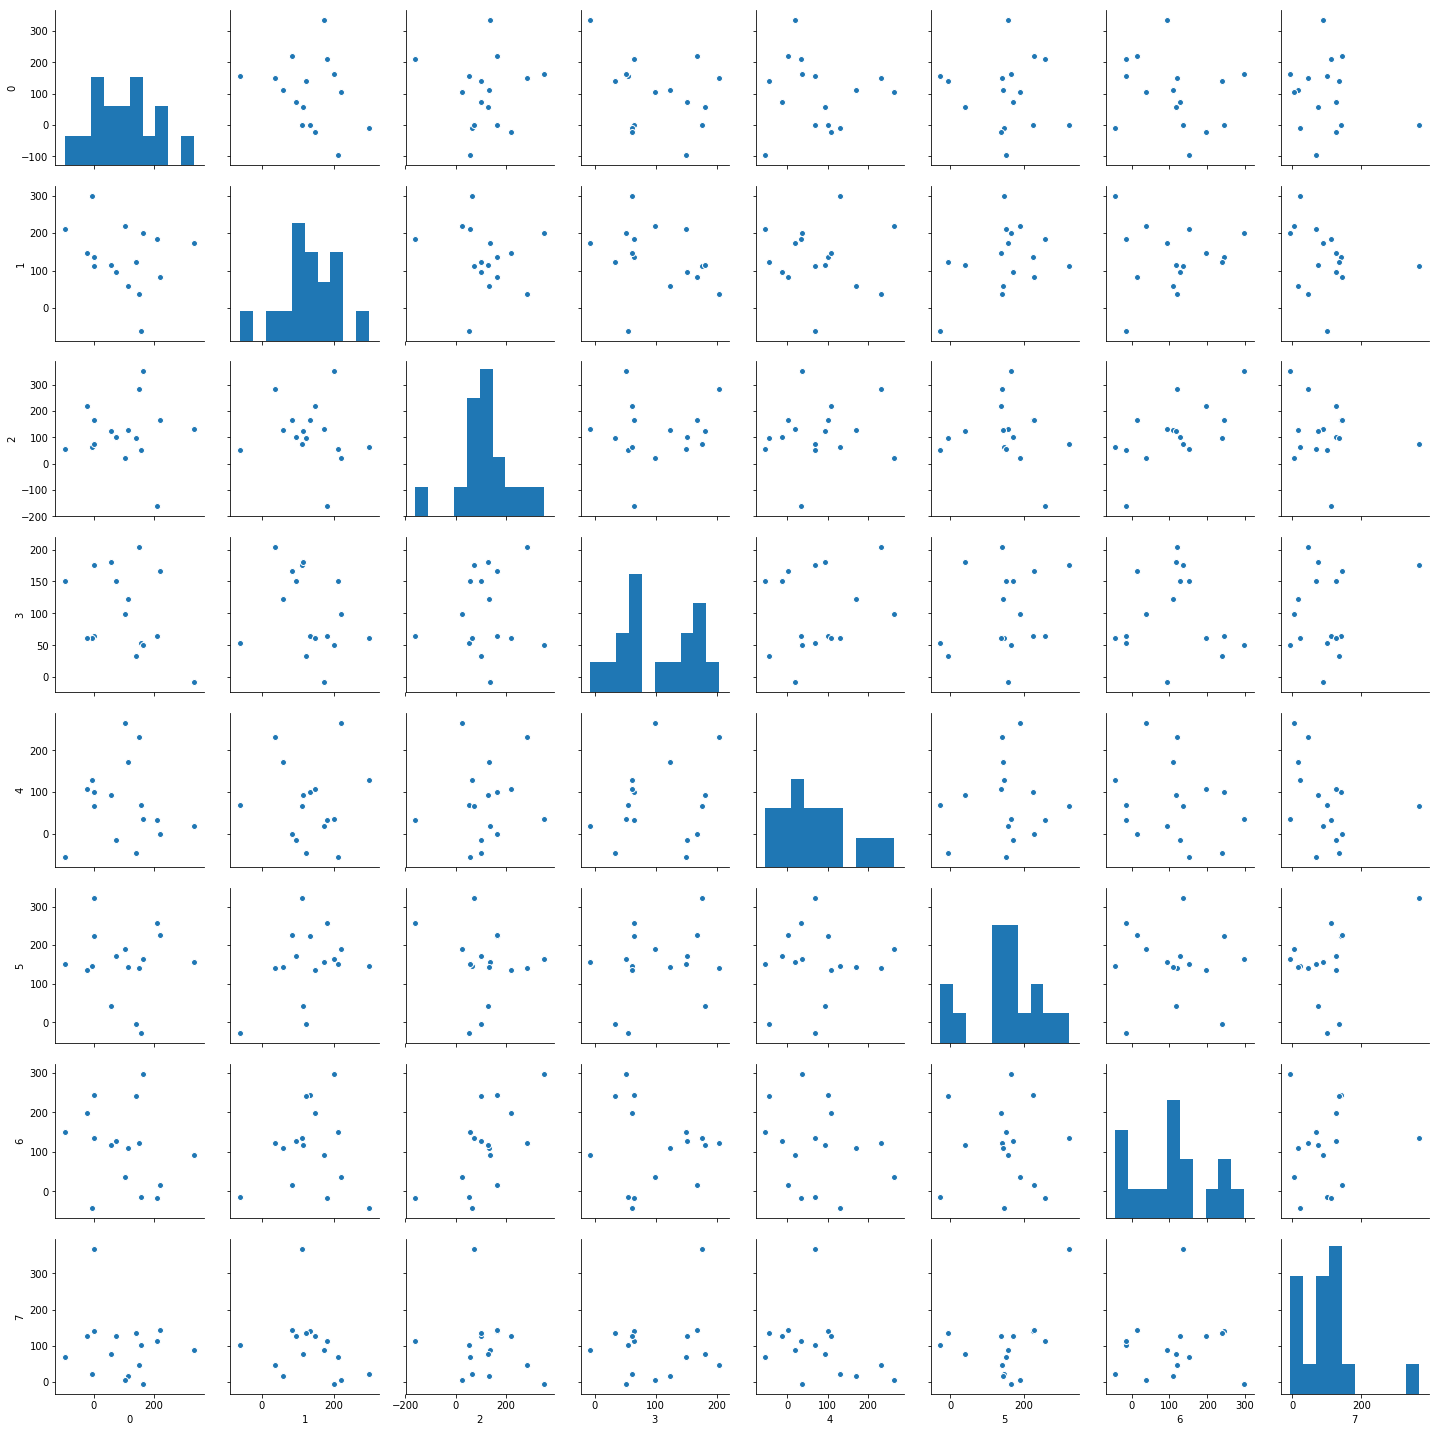

In [8]:

Var_Corr = df.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
plt.show()
# Basic correlogram
sns_plot = sns.pairplot(df)
plt.show()
#sns_plot.savefig("IMG/correlogram1.png")

## Symbols = { 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, +, -, *, /, =, ?}
Need to make a machine able to do computations based on pattern recognition

Initially no symbol is known

The symbols are given in series for learning

The system will be able to learn and reproduce the given patterns

The possible combinations are: (0-9) x (+, -, *, / ) x (0-9) x (=) x [ (0-9)x(0-9) + (?) ]

i.e. 10x4x10x1x(10x10+1)

Initially the system will generate some learning examples and ask for some predictions 



In [9]:
energy = 0 
all=[]
for i in range(10):
    print(i, end="\t")
    a = genData(["uniform", 0,10,4])    
    a= [int(x) for x in a]
    all.append(a)
    #print(int(a[0]) , int(a[1])%4, int(a[2]) ,int(a[3])%2)
    if(int(a[1])%4==0 and int(a[3])%2 == 0  ):
        print(int(a[0]) , "+", int(a[2]) ,"=", int(a[0])  + int(a[2]))
    elif(int(a[1])%4==0 and int(a[3])%2 == 1 ):
        print(int(a[0]) , "+", int(a[2]) ,"= ?")
    elif(int(a[1])%4==1 and int(a[3])%2 == 0  ):
        if(int(a[2])<int(a[0])):
            print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[0])  - int(a[2])))
        else:
            print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[2])  - int(a[0])))          
    elif(int(a[1])%4==1 and int(a[3])%2 == 1  ):
        print(int(a[0]) , "-", int(a[2]) ,"= ?")        
    elif(int(a[1])%4==2 and int(a[3])%2 == 0  ):
        print(int(a[0]) , "*", int(a[2]) ,"=", int(a[0])  * int(a[2]))
    elif(int(a[1])%4==2 and int(a[3])%2 == 1 ):
        print(int(a[0]) , "*", int(a[2]) ,"= ?")
    elif(int(a[1])%4==3 and int(a[3])%2 == 0  ):
        if(int(a[2])>0):
            print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[0])  / int(a[2])))
        else:
            print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[2])  / int(a[0])))    
    elif(int(a[1])%4==3 and int(a[3])%2 == 1  ):
        print(int(a[0]) , "/", int(a[2]) ,"= ?")
    

0	1 * 8 = ?
1	7 + 9 = ?
2	2 * 6 = ?
3	3 * 7 = ?
4	5 / 8 = ?
5	6 / 3 = ?
6	1 * 6 = 6
7	2 / 4 = 2
8	2 * 6 = 12
9	3 - 2 = ?


In [10]:
for i in range(1):
    print(i, end="\t")
    a = all[i]
    #print(int(a[0]) , int(a[1])%4, int(a[2]) ,int(a[3])%2)
    if(int(a[1])%4==0 and int(a[3])%2 == 0  ):
        print(int(a[0]) , "+", int(a[2]) ,"=", int(a[0])  + int(a[2]))
    elif(int(a[1])%4==0 and int(a[3])%2 == 1 ):
        print(int(a[0]) , "+", int(a[2]) ,"= ?")
    elif(int(a[1])%4==1 and int(a[3])%2 == 0  ):
        if(int(a[2])<int(a[0])):
            print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[0])  - int(a[2])))
        else:
            print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[2])  - int(a[0])))          
    elif(int(a[1])%4==1 and int(a[3])%2 == 1  ):
        print(int(a[0]) , "-", int(a[2]) ,"= ?")        
    elif(int(a[1])%4==2 and int(a[3])%2 == 0  ):
        print(int(a[0]) , "*", int(a[2]) ,"=", int(a[0])  * int(a[2]))
    elif(int(a[1])%4==2 and int(a[3])%2 == 1 ):
        print(int(a[0]) , "*", int(a[2]) ,"= ?")
    elif(int(a[1])%4==3 and int(a[3])%2 == 0  ):
        if(int(a[2])>0):
            print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[0])  / int(a[2])))
        else:
            print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[2])  / int(a[0])))    
    elif(int(a[1])%4==3 and int(a[3])%2 == 1  ):
        print(int(a[0]) , "/", int(a[2]) ,"= ?")

0	1 * 8 = ?


In [11]:
for i in range(10):
    print(all[i])

[1, 2, 8, 3]
[7, 8, 9, 9]
[2, 2, 6, 1]
[3, 6, 7, 5]
[5, 3, 8, 9]
[6, 3, 3, 9]
[1, 2, 6, 2]
[2, 9, 4, 8]
[2, 6, 6, 2]
[3, 1, 2, 3]


In [12]:
print("first symbol")
print(signals[a[0]])
print("operation")
print(signals[10+a[1]])
print("equal sign")
print("second symbol")
print(signals[a[2]])
print("response")

if(int(a[1])%4==3 and int(a[3])%2 == 0  ):
    if(int(a[2])>0):
        print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[0])  / int(a[2])))
    else:
        print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[2])  / int(a[0])))    
elif(int(a[1])%4==3 and int(a[3])%2 == 1  ):
        print(int(a[0]) , "/", int(a[2]) ,"= ?")
print(signals[a[3]])



first symbol
(72, 96, 102, 151, -14, 171, 127, 127)
operation
(334, 174, 134, -7, 19, 155, 93, 89)
equal sign
second symbol
(220, 84, 165, 167, 1, 227, 15, 144)
response
(140, 124, 99, 34, -46, -5, 240, 136)


In [13]:
print(" min = " , min(min(signals)))
print (" max = ", max(max(signals)))

 min =  -96
 max =  334


In [14]:
borders = [-200,-100,-50,0, 50, 100, 200]


for i in range(1):
    print(i, end="\t")
    a = all[i]
    print(a)
    print("first symbol")
    print(signals[a[0]])
    print("operation")
    print(signals[10+a[1]])
    print("equal sign")
    print("second symbol")
    print(signals[a[2]])
    print("response")


0	[1, 2, 8, 3]
first symbol
(72, 96, 102, 151, -14, 171, 127, 127)
operation
(334, 174, 134, -7, 19, 155, 93, 89)
equal sign
second symbol
(220, 84, 165, 167, 1, 227, 15, 144)
response


In [15]:
borders = [-200,-100,-50,0, 50, 100, 200]
qsignals = [] 

for i in range(len(signals)):
    sig = [] 
    print(signals[i])
    for j in range(int(len(signals[i])/2)):
        output = 7
        for k in range(7):
            if( signals[i][j] < borders[k]):
                output = k
                break
        print(output, end = " ")
        sig.append(k)
    print()
    qsignals.append(sig)
    


(157, -60, 54, 54, 69, -27, -14, 101)
6 2 5 5 
(72, 96, 102, 151, -14, 171, 127, 127)
5 5 6 6 
(0, 135, 165, 64, 100, 224, 244, 140)
4 6 6 5 
(140, 124, 99, 34, -46, -5, 240, 136)
6 6 5 4 
(-8, 299, 65, 62, 130, 146, -43, 23)
3 7 5 5 
(211, 183, -161, 65, 33, 257, -16, 112)
7 6 1 5 
(151, 38, 283, 204, 232, 141, 121, 47)
6 4 7 7 
(164, 200, 351, 51, 36, 163, 298, -5)
6 7 7 5 
(220, 84, 165, 167, 1, 227, 15, 144)
7 5 6 6 
(-96, 212, 56, 150, -55, 150, 151, 70)
2 7 5 6 
(0, 113, 74, 176, 68, 322, 135, 367)
4 6 5 6 
(-22, 148, 219, 62, 108, 136, 198, 126)
3 6 7 5 
(334, 174, 134, -7, 19, 155, 93, 89)
7 6 6 3 
(113, 58, 130, 123, 171, 143, 109, 17)
6 5 6 6 
(105, 220, 23, 99, 266, 190, 37, 5)
6 7 4 5 
(56, 114, 126, 181, 93, 41, 118, 76)
5 6 6 6 


    0  1  2  3
0   6  2  5  5
1   5  5  6  6
2   4  6  6  5
3   6  6  5  4
4   3  6  5  5
5   6  6  1  5
6   6  4  6  6
7   6  6  6  5
8   6  5  6  6
9   2  6  5  6
10  4  6  5  6
11  3  6  6  5
12  6  6  6  3
13  6  5  6  6
14  6  6  4  5
15  5  6  6  6


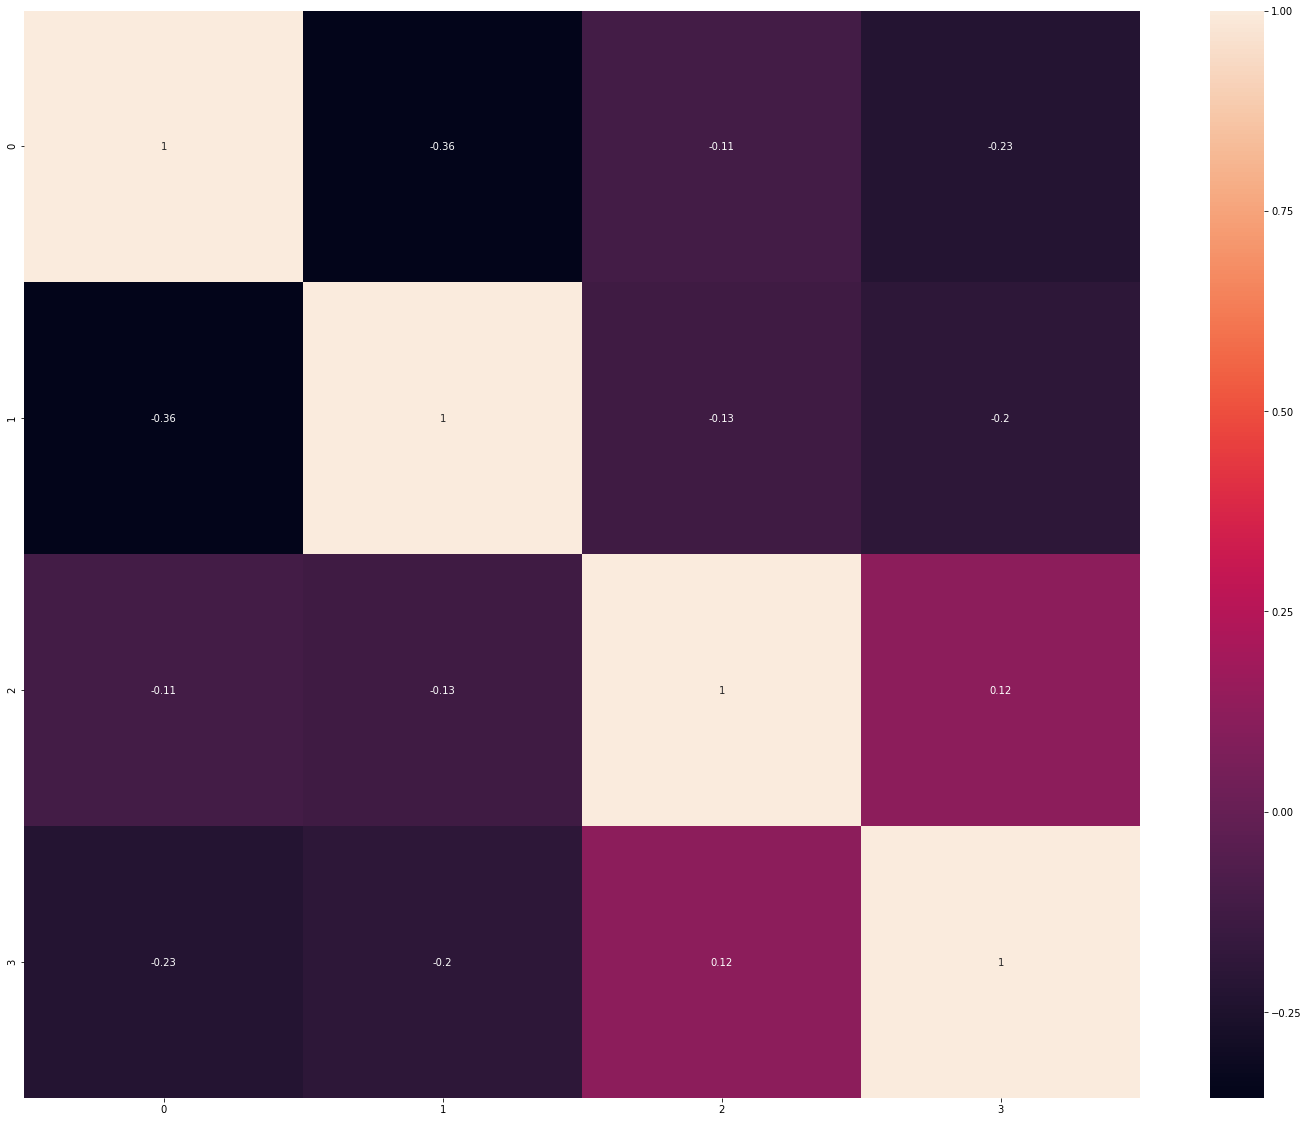

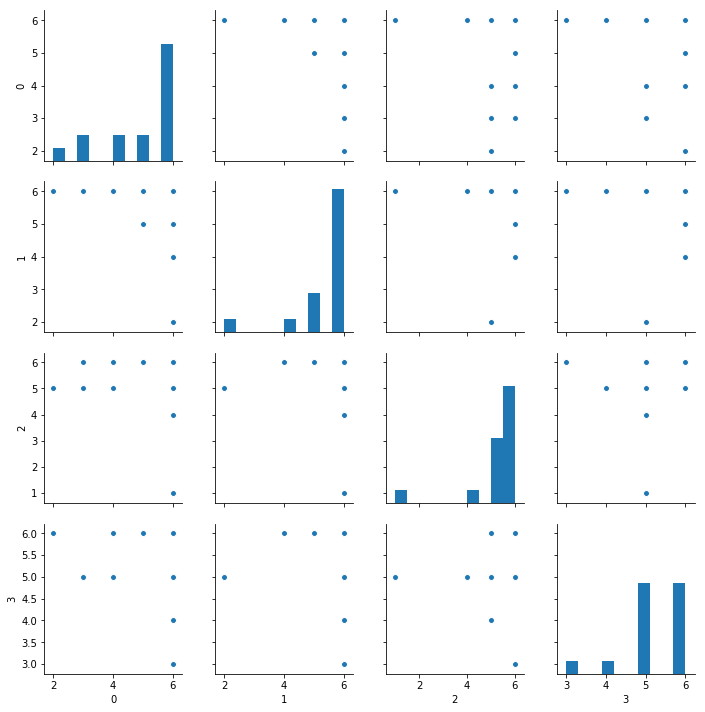

In [16]:
df = pd.DataFrame(qsignals)
print(df)

Var_Corr = df.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
plt.show()
# Basic correlogram
sns_plot = sns.pairplot(df)
plt.show()

In [17]:
inputs = [] 
for i in range(10):
    
    print(i, end="\t")
    a = all[i]
    print(int(a[0]) , int(a[1])%4, int(a[2]) ,int(a[3])%2)
    
    if(int(a[1])%4==0 and int(a[3])%2 == 0  ):
        if(int(a[0])  + int(a[2]) < 10):
            print( qsignals[int(a[0])] , "+", qsignals[int(a[2])] ,"=", qsignals[int(a[0])  + int(a[2])])            
            print( qsignals[int(a[0])] , qsignals[10], qsignals[int(a[2])] ,"=", qsignals[int(a[0])  + int(a[2])])            
            inputs.append([ qsignals[int(a[0])] , qsignals[10], qsignals[int(a[2])] , qsignals[int(a[0])  + int(a[2])]])            
    elif(int(a[1])%4==0 and int(a[3])%2 == 1 ):
        print( qsignals[int(a[0])] , "+", qsignals[int(a[2])] ,"=", qsignals[14])
        print( qsignals[int(a[0])] , qsignals[10], qsignals[int(a[2])] ,"=", qsignals[14])
        inputs.append( [qsignals[int(a[0])] , qsignals[10], qsignals[int(a[2])] , qsignals[14]])
    
    elif(int(a[1])%4==1 and int(a[3])%2 == 0  ):
        if(int(a[2])<int(a[0])):
            print( qsignals[int(a[0])] , "-", qsignals[int(a[2])] ,"=", qsignals[int(a[0])  - int(a[2])])
            print( qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] ,"=", qsignals[int(a[0])  - int(a[2])])
            inputs.append( [qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] , qsignals[int(a[0])  - int(a[2])]])
        else:
            print( qsignals[int(a[0])] , "-", qsignals[int(a[2])] ,"=", qsignals[int(a[2])  - int(a[0])])   
            print( qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] ,"=", qsignals[int(a[2])  - int(a[0])])   
            inputs.append( [qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] , qsignals[int(a[2])  - int(a[0])]])
            
    elif(int(a[1])%4==1 and int(a[3])%2 == 1  ):
        print( qsignals[int(a[0])] , "-", qsignals[int(a[2])] ,"=", qsignals[14])
        print( qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] ,"=", qsignals[14])
        inputs.append( [qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] , qsignals[14]])        
        
    elif(int(a[1])%4==2 and int(a[3])%2 == 0  ):
        if(int(a[0])  * int(a[2]) < 10):
            print( qsignals[int(a[0])] , "*", qsignals[int(a[2])] ,"=", qsignals[int(a[0])  * int(a[2])])
            print( qsignals[int(a[0])] , qsignals[12], qsignals[int(a[2])] ,"=", qsignals[int(a[0])  * int(a[2])])
            inputs.append( [qsignals[int(a[0])] , qsignals[12], qsignals[int(a[2])] , qsignals[int(a[0])  * int(a[2])]])
    elif(int(a[1])%4==2 and int(a[3])%2 == 1 ):
        print( qsignals[int(a[0])] , "*", qsignals[int(a[2])] ,"=", qsignals[14])
        print( qsignals[int(a[0])] ,  qsignals[12], qsignals[int(a[2])] ,"=", qsignals[14])
        inputs.append( [qsignals[int(a[0])] ,  qsignals[12], qsignals[int(a[2])] , qsignals[14]])
    elif(int(a[1])%4==3 and int(a[3])%2 == 0  ):
        if(int(a[2])>0):            
            print( qsignals[int(a[0])] , "/", qsignals[int(a[2])] ,"=", qsignals[int(a[0])  /int(a[2])])
            print( qsignals[int(a[0])] , qsignals[13], qsignals[int(a[2])] ,"=", qsignals[int(a[0])  /int(a[2])])
            inputs.append( [qsignals[int(a[0])] , qsignals[13], qsignals[int(a[2])] , qsignals[int(a[0])  /int(a[2])]])
         
    elif(int(a[1])%4==3 and int(a[3])%2 == 1  ):
        print( qsignals[int(a[0])] , "/", qsignals[int(a[2])] ,"=", qsignals[14])
        print( qsignals[int(a[0])] , qsignals[13], qsignals[int(a[2])] ,"=", qsignals[14])
        inputs.append( [qsignals[int(a[0])] , qsignals[13], qsignals[int(a[2])] , qsignals[14]])
        
        
        
    


0	1 2 8 1
[5, 5, 6, 6] * [6, 5, 6, 6] = [6, 6, 4, 5]
[5, 5, 6, 6] [6, 6, 6, 3] [6, 5, 6, 6] = [6, 6, 4, 5]
1	7 0 9 1
[6, 6, 6, 5] + [2, 6, 5, 6] = [6, 6, 4, 5]
[6, 6, 6, 5] [4, 6, 5, 6] [2, 6, 5, 6] = [6, 6, 4, 5]
2	2 2 6 1
[4, 6, 6, 5] * [6, 4, 6, 6] = [6, 6, 4, 5]
[4, 6, 6, 5] [6, 6, 6, 3] [6, 4, 6, 6] = [6, 6, 4, 5]
3	3 2 7 1
[6, 6, 5, 4] * [6, 6, 6, 5] = [6, 6, 4, 5]
[6, 6, 5, 4] [6, 6, 6, 3] [6, 6, 6, 5] = [6, 6, 4, 5]
4	5 3 8 1
[6, 6, 1, 5] / [6, 5, 6, 6] = [6, 6, 4, 5]
[6, 6, 1, 5] [6, 5, 6, 6] [6, 5, 6, 6] = [6, 6, 4, 5]
5	6 3 3 1
[6, 4, 6, 6] / [6, 6, 5, 4] = [6, 6, 4, 5]
[6, 4, 6, 6] [6, 5, 6, 6] [6, 6, 5, 4] = [6, 6, 4, 5]
6	1 2 6 0
[5, 5, 6, 6] * [6, 4, 6, 6] = [6, 4, 6, 6]
[5, 5, 6, 6] [6, 6, 6, 3] [6, 4, 6, 6] = [6, 4, 6, 6]
7	2 1 4 0
[4, 6, 6, 5] - [3, 6, 5, 5] = [4, 6, 6, 5]
[4, 6, 6, 5] [3, 6, 6, 5] [3, 6, 5, 5] = [4, 6, 6, 5]
8	2 2 6 0
9	3 1 2 1
[6, 6, 5, 4] - [4, 6, 6, 5] = [6, 6, 4, 5]
[6, 6, 5, 4] [3, 6, 6, 5] [4, 6, 6, 5] = [6, 6, 4, 5]


In [18]:
for i in inputs:
    print(i)

[[5, 5, 6, 6], [6, 6, 6, 3], [6, 5, 6, 6], [6, 6, 4, 5]]
[[6, 6, 6, 5], [4, 6, 5, 6], [2, 6, 5, 6], [6, 6, 4, 5]]
[[4, 6, 6, 5], [6, 6, 6, 3], [6, 4, 6, 6], [6, 6, 4, 5]]
[[6, 6, 5, 4], [6, 6, 6, 3], [6, 6, 6, 5], [6, 6, 4, 5]]
[[6, 6, 1, 5], [6, 5, 6, 6], [6, 5, 6, 6], [6, 6, 4, 5]]
[[6, 4, 6, 6], [6, 5, 6, 6], [6, 6, 5, 4], [6, 6, 4, 5]]
[[5, 5, 6, 6], [6, 6, 6, 3], [6, 4, 6, 6], [6, 4, 6, 6]]
[[4, 6, 6, 5], [3, 6, 6, 5], [3, 6, 5, 5], [4, 6, 6, 5]]
[[6, 6, 5, 4], [3, 6, 6, 5], [4, 6, 6, 5], [6, 6, 4, 5]]


In [19]:
merged_list=[]
for l in inputs:
    merged_list += list(l)

In [20]:
merged_list1=[]
for l in merged_list:
    merged_list1 += list(l)
print(merged_list1)

[5, 5, 6, 6, 6, 6, 6, 3, 6, 5, 6, 6, 6, 6, 4, 5, 6, 6, 6, 5, 4, 6, 5, 6, 2, 6, 5, 6, 6, 6, 4, 5, 4, 6, 6, 5, 6, 6, 6, 3, 6, 4, 6, 6, 6, 6, 4, 5, 6, 6, 5, 4, 6, 6, 6, 3, 6, 6, 6, 5, 6, 6, 4, 5, 6, 6, 1, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 4, 5, 6, 4, 6, 6, 6, 5, 6, 6, 6, 6, 5, 4, 6, 6, 4, 5, 5, 5, 6, 6, 6, 6, 6, 3, 6, 4, 6, 6, 6, 4, 6, 6, 4, 6, 6, 5, 3, 6, 6, 5, 3, 6, 5, 5, 4, 6, 6, 5, 6, 6, 5, 4, 3, 6, 6, 5, 4, 6, 6, 5, 6, 6, 4, 5]


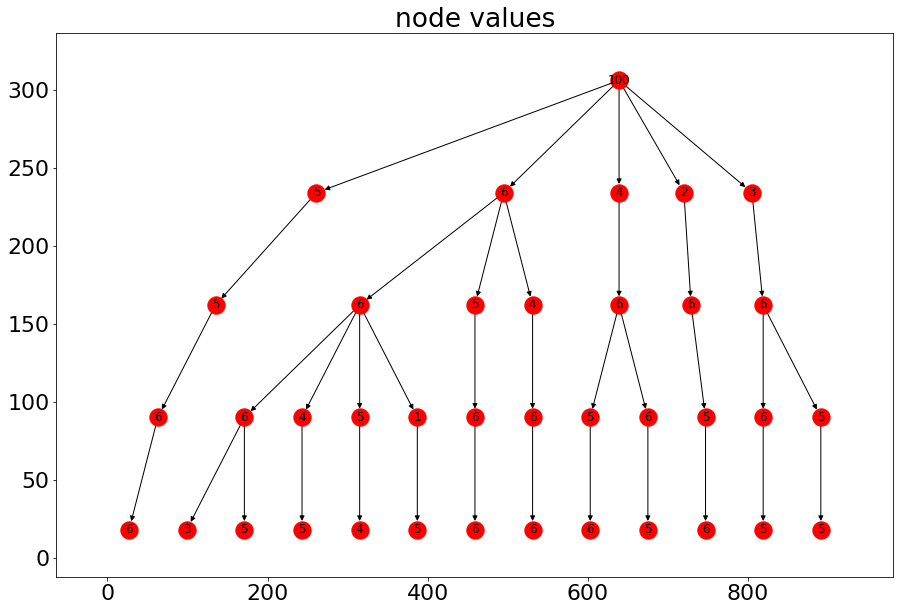

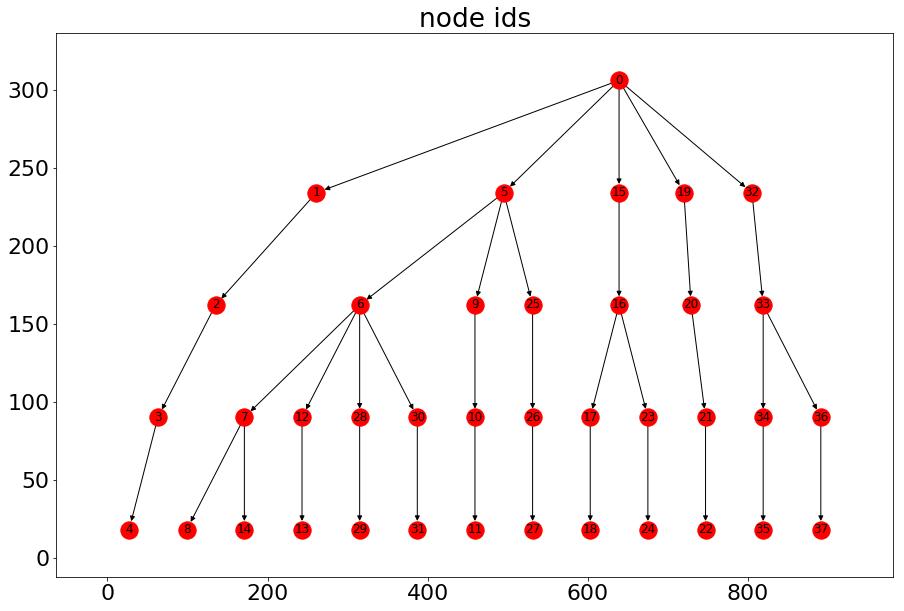

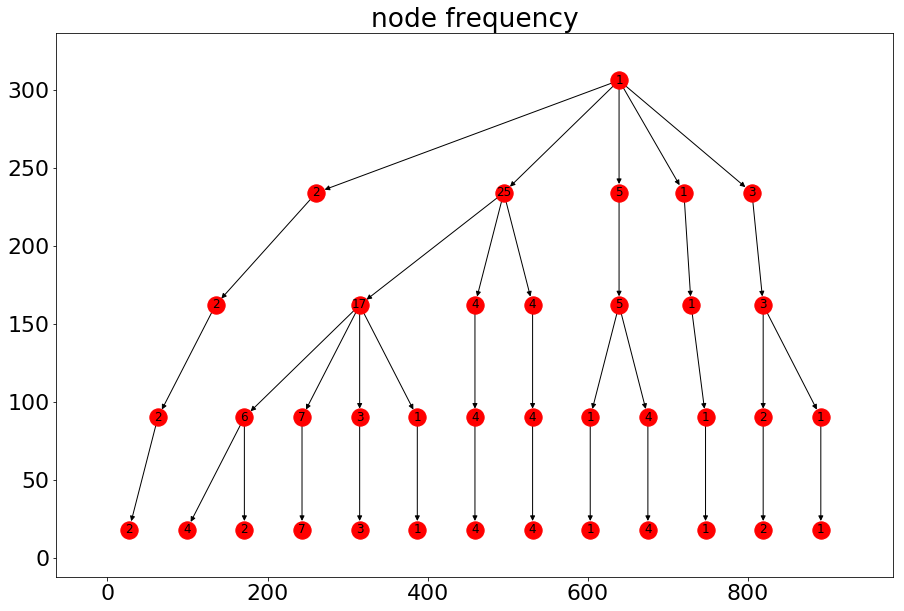

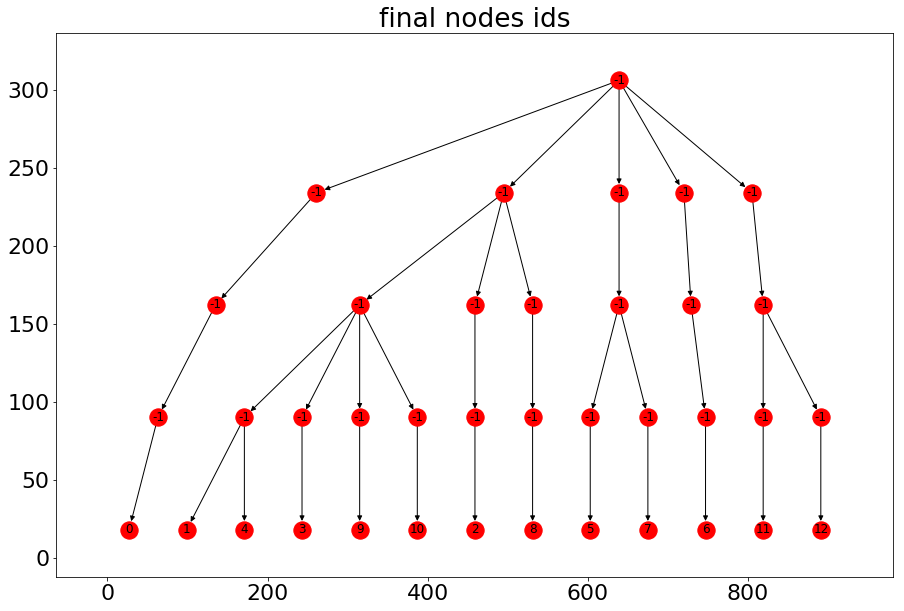

In [21]:

plt.rcParams.update({'font.size': 22})

data1= merged_list1 

GG=nx.DiGraph()

counter = 0
GG.add_node(counter, k=100,cc=1, id = -1,food =0)
counter = counter+1
poz = 0
#print(len(data1)/WL)
WL = 4 # window length
overlap = 0# int(WL/5)
step = WL-overlap

for i in range(0,len(data1)-step+1, step):
    #if(data1[i:i+step]==[0,0,1,0] or  data1[i:i+step]==[1,0,0,0] ):
    #    //print(str(i)+ " food")
    poz=0
    for j in range(WL):
        # data
        d=data1[i + j]
        #print(d, end=' ')
        #print (d)
        # neighbours 
        nei= list(GG.neighbors(poz))       
        if len(nei)==0:
            #print (counter, poz, data1[i: i+step])
            GG.add_node(counter,k=d, cc=1, id = -1,food =0)    
            GG.add_edge(poz,counter)
            poz=counter
            counter +=1
        else:
            k=-1
            for n in nei:
                if(GG.node[n]['k']==d):
                    k=n
                    break
            if(k>=0):
                poz=k
                GG.node[k]['cc'] = GG.node[k]['cc'] + 1
            else:
                GG.add_node(counter,k=d,cc=1, id = -1,food =0)    
                GG.add_edge(poz,counter)
                poz=counter
                counter += 1

plt.rcParams['figure.figsize'] = [15, 10]        
labels=dict((n,d['k']) for n,d in GG.nodes(data=True))   
#pos=nx.graphviz_layout(GG, prog='dot')
pos =graphviz_layout(GG, prog='dot')
#nx.spring_layout(GG)

plt.title("node values")
nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
plt.show()

plt.title("node ids")
nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True )
plt.show()

plt.title("node frequency")
labels=dict((n,d['cc']) for n,d in GG.nodes(data=True))   
nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
plt.show()

finalNodes = [] 
for i in range(1, counter):
    yol =  nx.shortest_path(GG,0,i)
    if(len(yol) >WL):
        GG.node[yol[-1]]['id']=len(finalNodes)
        finalNodes.append(yol[-1])
        
plt.title("final nodes ids")
labels=dict((n,d['id']) for n,d in GG.nodes(data=True))   
nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
plt.show()    

In [22]:
branch = [[6, 4, 6, 6], [4, 6, 5, 6], [2, 6, 5, 6], [6, 6, 4, 5]]
merged_list=[]
for l in branch:
    merged_list += list(l)
brach = merged_list
data1=branch


for i in range(0,len(data1)-step+1, step):
    #if(data1[i:i+step]==[0,0,1,0] or  data1[i:i+step]==[1,0,0,0] ):
    #    //print(str(i)+ " food")
    poz=0
    for j in range(WL):
        # data
        d=data1[i + j]
        #print(d, end=' ')
        #print (d)
        # neighbours 
        nei= list(GG.neighbors(poz))       
        if len(nei)==0:
            #print (counter, poz, data1[i: i+step])
            GG.add_node(counter,k=d, cc=1, id = -1,food =0)    
            GG.add_edge(poz,counter)
            poz=counter
            counter +=1
        else:
            k=-1
            for n in nei:
                if(GG.node[n]['k']==d):
                    k=n
                    break
            if(k>=0):
                poz=k
                GG.node[k]['cc'] = GG.node[k]['cc'] + 1
            else:
                GG.add_node(counter,k=d,cc=1, id = -1,food =0)    
                GG.add_edge(poz,counter)
                poz=counter
                counter += 1

        print(poz)
            


38
39
40
41


In [23]:
print(k)

-1
